In [ ]:
mkdir data

In [95]:
cd data

[Errno 2] No such file or directory: 'data'
/content/data


In [96]:
# matplotlib日本語化のためのライブラリのインストール
!pip install japanize-matplotlib

In [97]:
# 各種ライブラリのインポート
import pandas as pd
import japanize_matplotlib
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [98]:
# csvファイルの読み込み
df = pd.read_csv('auto_mgp.csv', encoding='cp932')

In [99]:
# 先頭5行表示
df.head(5)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1


In [100]:
# 末尾5行表示
df.tail(5)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,393,27.0,4,140.0,86.0,2790,15.6,82,1
394,394,44.0,4,97.0,52.0,2130,24.6,82,2
395,395,32.0,4,135.0,84.0,2295,11.6,82,1
396,396,28.0,4,120.0,79.0,2625,18.6,82,1
397,397,31.0,4,119.0,82.0,2720,19.4,82,1


In [101]:
# 1列目、不要なので削除
df2 = df.drop('Unnamed: 0', axis=1)
df2.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [160]:
# ダミー化
origin = pd.get_dummies(df2['Origin'], drop_first=False)
df3 = pd.concat([df2, origin], axis=1)
df3 = df3.drop('Origin', axis=1)
df4 =df3.rename(columns={1:'アメ車', 2: '欧州車', 3: '日本車'})
df4

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,アメ車,欧州車,日本車
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [161]:
# 訓練・検証データ、テストデータに分割
train_val, test = train_test_split(df4, test_size=0.2, random_state=0)

In [162]:
# 欠損値の確認
# ⇒Horsepowerに欠損値あり
train_val.isnull().any(axis=0)

MPG             False
Cylinders       False
Displacement    False
Horsepower       True
Weight          False
Acceleration    False
Model Year      False
アメ車             False
欧州車             False
日本車             False
dtype: bool

In [163]:
# 欠損値の数の確認
print(f'欠損値の数：{train_val["Horsepower"].isnull().sum()}')

欠損値の数：5


In [164]:
# 欠損値を一旦、平均値で穴埋め
train_val_mean = train_val.mean()
train_val2=train_val.fillna(train_val_mean)

In [165]:
# 念のため欠損値が穴埋めされたか確認
# ⇒欠損値の穴埋め完了
train_val2.isnull().any(axis=0)

MPG             False
Cylinders       False
Displacement    False
Horsepower      False
Weight          False
Acceleration    False
Model Year      False
アメ車             False
欧州車             False
日本車             False
dtype: bool

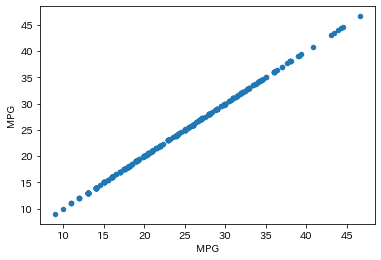

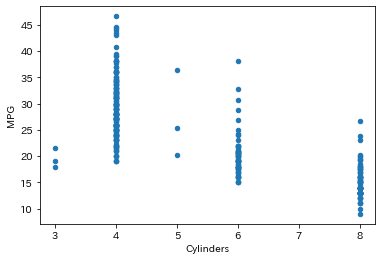

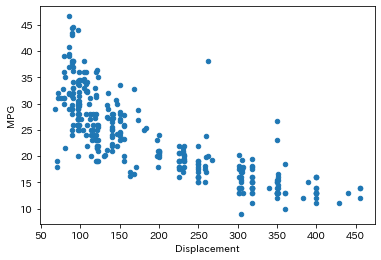

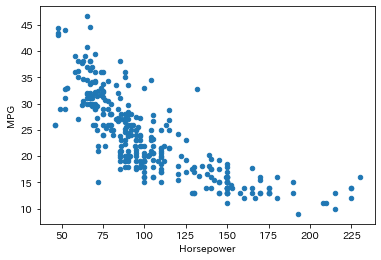

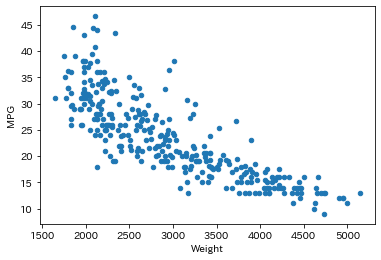

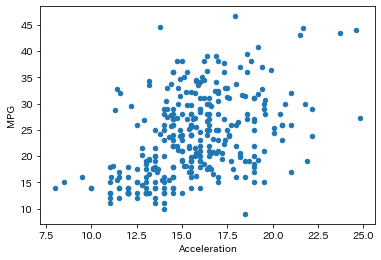

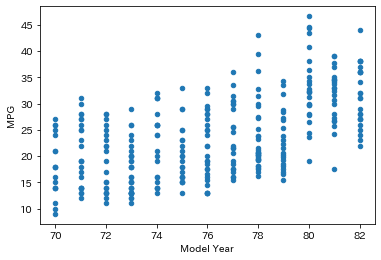

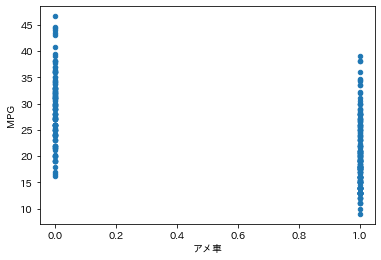

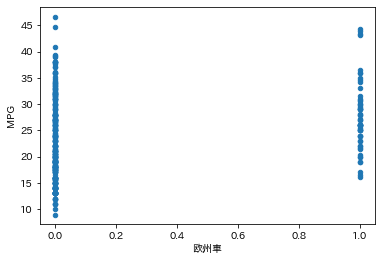

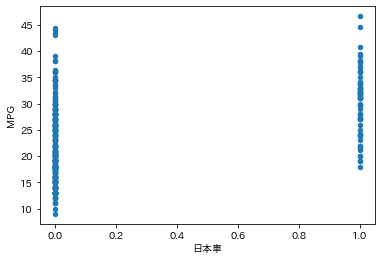

In [166]:
# 散布図の作成
colname = train_val2.columns
for name in colname:
  train_val2.plot(kind='scatter', x=name, y='MPG')

In [167]:
# 相関係数の確認
train_val2.corr()['MPG'].map(abs).sort_values(ascending=False)

MPG             1.000000
Weight          0.823764
Displacement    0.798952
Horsepower      0.786905
Cylinders       0.766144
アメ車             0.574236
Model Year      0.573256
Acceleration    0.462807
日本車             0.455004
欧州車             0.249051
Name: MPG, dtype: float64

In [168]:
# 訓練データ・テストデータの抜き出し
x_col = ['Weight', 'Displacement', 'Horsepower','Cylinders','アメ車', 'Model Year', 'Acceleration', '日本車', '欧州車', ]
x = train_val2[x_col]
t = train_val2[['MPG']]

In [169]:
# 標準化と学習関数の作成
from sklearn.preprocessing import StandardScaler

def learn(x, t):
  x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)
  
  sc_model_x = StandardScaler()
  sc_model_y = StandardScaler()

  sc_model_x.fit(x_train)
  sc_x_train = sc_model_x.transform(x_train)

  sc_model_y.fit(y_train)
  sc_y_train = sc_model_y.transform(y_train)

  model = LinearRegression()
  model.fit(sc_x_train, sc_y_train)

  sc_x_val = sc_model_x.transform(x_val)
  sc_y_val = sc_model_y.transform(y_val)

  train_score = model.score(sc_x_train, sc_y_train)
  val_score = model.score(sc_x_val, sc_y_val)

  # 戻り値：作成したモデル、特徴量の標準化、正解データの標準化、訓練スコア、検証スコア
  return model, sc_model_x, sc_model_y, train_score, val_score

In [170]:
# 訓練データ・検証データのスコア確認
model, sc_model_x, sc_model_y, s1, s2 = learn(x, t)

print(f'訓練データスコア：{s1}')
print(f'検証データスコア：{s2}')

訓練データスコア：0.8219880516063901
検証データスコア：0.8086313420316465


In [171]:
# テストデータの欠損値の確認
# ⇒Horsepowerに欠損値あり
test.isnull().any(axis=0)

MPG             False
Cylinders       False
Displacement    False
Horsepower       True
Weight          False
Acceleration    False
Model Year      False
アメ車             False
欧州車             False
日本車             False
dtype: bool

In [172]:
# 欠損値の数の確認
print(f'欠損値の数：{test["Horsepower"].isnull().sum()}')

欠損値の数：1


In [173]:
# テストデータの欠損値を訓練データの平均で穴埋め
test2 = test.fillna(train_val.mean())

In [174]:
# テストデータの決定係数を確認
x_test = test2[x_col]
y_test = test2[['MPG']]

sc_x_test = sc_model_x.transform(x_test)
sc_y_test = sc_model_y.transform(y_test)

print(f'テストデータのスコア：{model.score(sc_x_test, sc_y_test)}')

テストデータのスコア：0.833523343337763


In [175]:
# マハラノビス距離の測定
from sklearn.covariance import MinCovDet

train_val3 = train_val2.iloc[:,1:8]
mcd = MinCovDet(random_state=0, support_fraction=0.7)
mcd.fit(train_val3)

distance = mcd.mahalanobis(train_val3)
distance

array([  4.76335855,   9.20776934,   2.65910332,  12.0703223 ,
         6.52862643,   3.33940937,   5.13709448,   4.63511761,
        33.6822807 ,  10.14521621,  17.45359033, 101.35864088,
        14.33295353,   6.93286354,  19.36865348,   6.04292622,
        31.03512004,  10.73412661,   5.20421073,  23.19946743,
         5.24197936,   5.3494735 ,   5.34440424,   6.09080284,
         7.43856238,   7.11213439,   9.76211697,  23.28919555,
         5.45128453,  10.46491613,   7.15176052,   5.5514353 ,
         4.37577611,   5.04955996,   9.64734201,   4.4944552 ,
         9.92243229,   5.41052434,   5.49763704,   3.39110321,
        10.58767421,   6.4197677 ,   9.80894518,   9.03697689,
         5.78171716,  18.73849914,   3.54519511,   3.72623957,
         1.75315549,   4.44945726,   7.29242353,   7.52485191,
         2.29049513,   3.51015508,   4.83205445,  26.82799187,
         5.11369356,   9.10244275,   3.33451061,   3.05337013,
         9.92977209,   3.39625634,   3.00812879,  24.15

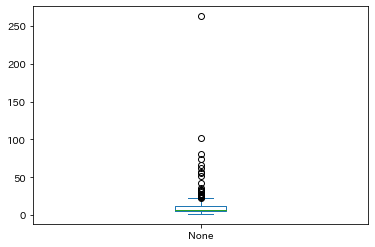

In [176]:
# 箱ひげ図の表示
distance = pd.Series(distance)
distance.plot(kind='box')

In [177]:
# 外れ値の削除
tmp = distance.describe()
tmp

count    318.000000
mean      11.570744
std       18.357644
min        1.525780
25%        5.008270
50%        7.088106
75%       12.040364
max      262.728792
dtype: float64

In [178]:
# マハラノビス距離による外れ値の一覧
iqr = tmp['75%'] - tmp['25%']
jougen = 1.5 * (iqr) + tmp['75%']
kagen = tmp['25%'] - 1.5 * (iqr)

outliner = distance[ (distance > jougen) | (distance < kagen)]
outliner

8       33.682281
11     101.358641
16      31.035120
19      23.199467
27      23.289196
55      26.827992
63      24.154062
67      80.878481
68      26.264148
72      32.096364
111     56.568668
128     51.600422
147    262.728792
189     27.941102
197     25.076719
206     25.156275
211     26.340988
225     62.329635
227     74.462176
247     27.544990
267     66.163888
274     36.358555
279     28.269362
293     55.492066
303     32.749506
307     26.474136
308     33.426349
309     42.759444
dtype: float64

In [179]:
# 外れ値の削除
train_val3 = train_val2.drop(train_val2.index[outliner.index])
train_val3

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,アメ車,欧州車,日本車
64,15.0,8,318.0,150.0,4135,13.5,72,1,0,0
55,27.0,4,97.0,60.0,1834,19.0,71,0,1,0
317,34.3,4,97.0,78.0,2188,15.8,80,0,1,0
102,26.0,4,97.0,46.0,1950,21.0,73,0,1,0
358,31.6,4,120.0,74.0,2635,18.3,81,0,0,1
...,...,...,...,...,...,...,...,...,...,...
323,27.9,4,156.0,105.0,2800,14.4,80,1,0,0
192,22.0,6,250.0,105.0,3353,14.5,76,1,0,0
117,29.0,4,68.0,49.0,1867,19.5,73,0,1,0
47,19.0,6,250.0,100.0,3282,15.0,71,1,0,0


In [180]:
# 外れ値処理後の訓練データ・テストデータの抜き出し
x2 = train_val3[x_col]
t2 = train_val3[['MPG']]

# 訓練データ・検証データのスコア確認
model2, sc_model_x2, sc_model_y2, s3, s4 = learn(x2, t2)

print(f'訓練データスコア：{s3}')    # 訓練データはスコアDOWN
print(f'検証データスコア：{s4}')    # 検証データはスコアUP

訓練データスコア：0.815865865672666
検証データスコア：0.7842791497571195


In [181]:
# テストデータの決定係数を確認
x_test = test2[x_col]
y_test = test2[['MPG']]

sc_x_test = sc_model_x2.transform(x_test)
sc_y_test = sc_model_y2.transform(y_test)

print(f'テストデータのスコア：{model2.score(sc_x_test, sc_y_test)}')  # テストデータはスコアDOWN

テストデータのスコア：0.8300009741186072


In [182]:
# 特徴量エンジニアリング（自動）を行ったlearn関数
from sklearn.preprocessing import PolynomialFeatures

def learn2(x, t):
  x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)
  
  sc_model_x = StandardScaler()
  sc_model_y = StandardScaler()
  pf = PolynomialFeatures(degree=2, include_bias=False)

  sc_model_x.fit(x_train)
  sc_x_train = sc_model_x.transform(x_train)
  pf_sc_x_train = pf.fit_transform(sc_x_train)

  sc_model_y.fit(y_train)
  sc_y_train = sc_model_y.transform(y_train)

  model = LinearRegression()
  model.fit(pf_sc_x_train, sc_y_train)

  sc_x_val = sc_model_x.transform(x_val)
  pf_sc_x_val = pf.fit_transform(sc_x_val)
  sc_y_val = sc_model_y.transform(y_val)

  train_score = model.score(pf_sc_x_train, sc_y_train)
  val_score = model.score(pf_sc_x_val, sc_y_val)

  # 戻り値：作成したモデル、特徴量の標準化、正解データの標準化、特徴量エンジニアリング（一括）、訓練スコア、検証スコア
  return model, sc_model_x, sc_model_y, pf, train_score, val_score
  

In [183]:
# 訓練データ・検証データのスコア確認
model3, sc_model_x3, sc_model_y3, pf, s5, s6 = learn2(x2, t2)

print(f'訓練データスコア：{s5}')    # 訓練データはスコアUP
print(f'検証データスコア：{s6}')    # 検証データはスコアDOWN

訓練データスコア：0.9042348318760116
検証データスコア：0.7792745824552083


In [184]:
# 特徴量エンジニアリングを行った場合のテストデータのスコア
pf_sc_x_test = pf.fit_transform(sc_x_test)
print(f'テストデータのスコア：{model3.score(pf_sc_x_test, sc_y_test)}')  # テストデータはスコアDOWN

テストデータのスコア：0.7809452438221666


In [185]:
# リッジ回帰を使用したlearn関数
from sklearn.linear_model import Ridge

def learn3(x, t, a=10):
  x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)
  
  sc_model_x = StandardScaler()
  sc_model_y = StandardScaler()
  pf = PolynomialFeatures(degree=2, include_bias=False)

  sc_model_x.fit(x_train)
  sc_x_train = sc_model_x.transform(x_train)
  pf_sc_x_train = pf.fit_transform(sc_x_train)

  sc_model_y.fit(y_train)
  sc_y_train = sc_model_y.transform(y_train)

  model = Ridge(alpha = a)
  model.fit(pf_sc_x_train, sc_y_train)

  sc_x_val = sc_model_x.transform(x_val)
  pf_sc_x_val = pf.fit_transform(sc_x_val)
  sc_y_val = sc_model_y.transform(y_val)

  train_score = model.score(pf_sc_x_train, sc_y_train)
  val_score = model.score(pf_sc_x_val, sc_y_val)

  # 戻り値：作成したモデル、特徴量の標準化、正解データの標準化、特徴量エンジニアリング（一括）、訓練スコア、検証スコア
  return model, sc_model_x, sc_model_y, pf, train_score, val_score

In [186]:
# 訓練データ・検証データのスコア確認
ridgeModel, sc_model_x4, sc_model_y4, pf2, s7, s8 = learn3(x2, t2)

print(f'訓練データスコア：{s7}')    # 訓練データはスコアUP
print(f'検証データスコア：{s8}')    # 検証データはスコアUP

訓練データスコア：0.8949075084378377
検証データスコア：0.8391324752450036


In [187]:
# リッジ回帰のalphaの最大値を探る
maxTrainScore = 0
maxValScore = 0
maxIndex = 0
maxRidgeModel = ""


for i in range(1, 2001):
  num = i / 100
  ridgeModel2, sc_model_x5, sc_model_y5, pf3, s7, s8 = learn3(x2, t2, num)

  if s8 > maxValScore:
    maxTrainScore = s7
    maxValScore = s8
    max_index = num
    maxRidgeModel = ridgeModel2

print(f'αの最大値:{num}')
print(f'訓練データの最大スコア：{maxTrainScore}')
print(f'検証データの最大スコア：{maxValScore}')

αの最大値:20.0
訓練データの最大スコア：0.8892344253045849
検証データの最大スコア：0.8430783587386779


In [188]:
# リッジ回帰でのテストデータのスコア
print(f'テストデータのスコア：{maxRidgeModel.score(pf_sc_x_test, sc_y_test)}')  # テストデータはスコアUP

テストデータのスコア：0.8602337555899456


In [189]:
# ラッソ回帰を使ったlearn関数
from sklearn.linear_model import Lasso

def learn4(x, t, alpha=0.1):
  x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)
  
  sc_model_x = StandardScaler()
  sc_model_y = StandardScaler()
  pf = PolynomialFeatures(degree=2, include_bias=False)

  sc_model_x.fit(x_train)
  sc_x_train = sc_model_x.transform(x_train)
  pf_sc_x_train = pf.fit_transform(sc_x_train)

  sc_model_y.fit(y_train)
  sc_y_train = sc_model_y.transform(y_train)

  model = Lasso(alpha = alpha)
  model.fit(pf_sc_x_train, sc_y_train)

  sc_x_val = sc_model_x.transform(x_val)
  pf_sc_x_val = pf.fit_transform(sc_x_val)
  sc_y_val = sc_model_y.transform(y_val)

  train_score = model.score(pf_sc_x_train, sc_y_train)
  val_score = model.score(pf_sc_x_val, sc_y_val)

  # 戻り値：作成したモデル、特徴量の標準化、正解データの標準化、特徴量エンジニアリング（一括）、訓練スコア、検証スコア
  return model, sc_model_x, sc_model_y, pf, train_score, val_score

In [190]:
# 訓練データ・検証データのスコア確認（α＝0.001のときの確認）
lassoModel, sc_model_x5, sc_model_y5, pf3, s9, s10 = learn4(x2, t2, 0.001)

print(f'訓練データスコア：{s9}')    # 訓練データはスコアUP
print(f'検証データスコア：{s10}')   # 検証データはスコアUP

訓練データスコア：0.9015997434496485
検証データスコア：0.8223682438185091


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.159e-02, tolerance: 2.320e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [191]:
# 訓練データ・検証データのスコア確認
max_s9 = 0
max_s10 = 0
max_alpha = 0
max_lassoModel = ''

# 1～0.001までのαの数値を変化させて最大値を求めている。
for alpha in range(1000, 0, -1):
  alpha /= 1000
  lassoModel, sc_model_x5, sc_model_y5, pf3, s9, s10 = learn4(x2, t2, alpha)

  if s10 > max_s10:
    max_s9 = s9
    max_s10 = s10
    max_alpha = alpha
    max_lassoModel = lassoModel

print(f'αの最大値:{max_alpha}')
print(f'訓練データスコア：{max_s9}')    # 訓練データはスコアUP
print(f'検証データスコア：{max_s10}')   # 検証データはスコアUP


αの最大値:0.015
訓練データスコア：0.8844628336104191
検証データスコア：0.8485982020568821


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.159e-02, tolerance: 2.320e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [192]:
# 回帰式の係数を確認
weight = max_lassoModel.coef_
pd.Series(weight, index = pf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


x0      -0.672132
x1      -0.091383
x2      -0.072592
x3      -0.000000
x4      -0.018314
x5       0.341925
x6      -0.000000
x7       0.000000
x8       0.000000
x0^2     0.119866
x0 x1    0.000000
x0 x2    0.000000
x0 x3    0.000000
x0 x4    0.000000
x0 x5   -0.000000
x0 x6    0.010861
x0 x7   -0.000000
x0 x8    0.000000
x1^2     0.000000
x1 x2    0.000000
x1 x3   -0.000000
x1 x4    0.000000
x1 x5   -0.000000
x1 x6    0.000000
x1 x7   -0.000000
x1 x8   -0.000000
x2^2    -0.000000
x2 x3   -0.000000
x2 x4    0.000000
x2 x5   -0.069574
x2 x6    0.000000
x2 x7   -0.000000
x2 x8    0.000000
x3^2    -0.000000
x3 x4   -0.000000
x3 x5   -0.000000
x3 x6    0.003020
x3 x7    0.000000
x3 x8   -0.000000
x4^2     0.000000
x4 x5   -0.046811
x4 x6   -0.090185
x4 x7   -0.000000
x4 x8   -0.000000
x5^2     0.047182
x5 x6    0.000568
x5 x7    0.003089
x5 x8    0.000000
x6^2     0.028315
x6 x7    0.000000
x6 x8    0.028572
x7^2     0.019178
x7 x8   -0.000000
x8^2     0.000000
dtype: float64

In [193]:
# ラッソ回帰でのテストデータのスコア
# ⇒検証データほどスコア伸びず。
print(f'テストデータのスコア：{max_lassoModel.score(pf_sc_x_test, sc_y_test)}')  # テストデータはスコアUP

テストデータのスコア：0.8641516021259243


In [194]:
# アダブーストによる回帰
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


def learn5(x, t):
  x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)

  sc_model_x = StandardScaler()
  sc_model_y = StandardScaler()
  pf = PolynomialFeatures(degree=2, include_bias=False)

  sc_model_x.fit(x_train)
  sc_x_train = sc_model_x.transform(x_train)
  pf_sc_x_train = pf.fit_transform(sc_x_train)

  sc_model_y.fit(y_train)
  sc_y_train = sc_model_y.transform(y_train)

  base = DecisionTreeRegressor(random_state=0, max_depth=3)
  model = AdaBoostRegressor(random_state=0, n_estimators=100, base_estimator=base)
  model.fit(pf_sc_x_train, sc_y_train)

  sc_x_val = sc_model_x.transform(x_val)
  pf_sc_x_val = pf.fit_transform(sc_x_val)
  sc_y_val = sc_model_y.transform(y_val)
  
  train_score = model.score(pf_sc_x_train, sc_y_train)
  val_score = model.score(pf_sc_x_val, sc_y_val)

  # 戻り値：作成したモデル、特徴量の標準化、正解データの標準化、特徴量エンジニアリング（一括）、訓練スコア、検証スコア
  return model, sc_model_x, sc_model_y, pf, train_score, val_score

In [195]:
# 訓練データ・検証データのスコア確認
adaBoostModel, sc_model_x6, sc_model_y6, pf4, s11, s12 = learn5(x2, t2)

print(f'訓練データスコア：{s9}')    # 訓練データはスコアUP
print(f'検証データスコア：{s10}')   # 検証データはスコアUP

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


訓練データスコア：0.9015997434496485
検証データスコア：0.8223682438185091


In [196]:
# アダブーストでのテストデータのスコア
print(f'テストデータのスコア：{adaBoostModel.score(pf_sc_x_test, sc_y_test)}')  # テストデータはスコアUP

テストデータのスコア：0.8705495698990993


In [197]:
# ランダムフォレストによる回帰
from sklearn.ensemble import RandomForestRegressor

def learn6(x, t):
  x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)

  sc_model_x = StandardScaler()
  sc_model_y = StandardScaler()
  pf = PolynomialFeatures(degree=2, include_bias=False)

  sc_model_x.fit(x_train)
  sc_x_train = sc_model_x.transform(x_train)
  pf_sc_x_train = pf.fit_transform(sc_x_train)

  sc_model_y.fit(y_train)
  sc_y_train = sc_model_y.transform(y_train)

  model = RandomForestRegressor(random_state=0, n_estimators=100)
  model.fit(pf_sc_x_train, sc_y_train)

  sc_x_val = sc_model_x.transform(x_val)
  pf_sc_x_val = pf.fit_transform(sc_x_val)
  sc_y_val = sc_model_y.transform(y_val)
  
  train_score = model.score(pf_sc_x_train, sc_y_train)
  val_score = model.score(pf_sc_x_val, sc_y_val)

  # 戻り値：作成したモデル、特徴量の標準化、正解データの標準化、特徴量エンジニアリング（一括）、訓練スコア、検証スコア
  return model, sc_model_x, sc_model_y, pf, train_score, val_score

In [198]:
# 訓練データ・検証データのスコア確認
randForestModel, sc_model_x7, sc_model_y7, pf5, s13, s14 = learn6(x2, t2)

print(f'訓練データスコア：{s9}')    # 訓練データはスコアUP
print(f'検証データスコア：{s10}')   # 検証データはスコアUP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


訓練データスコア：0.9015997434496485
検証データスコア：0.8223682438185091


In [199]:
# ランダムフォレストでのテストデータのスコア
print(f'テストデータのスコア：{randForestModel.score(pf_sc_x_test, sc_y_test)}')  # テストデータはスコアUP

テストデータのスコア：0.8927271668580681


# 上記結果のまとめ
## ①外れ値処理前
## 　線形モデル（特徴量エンジニアリングなし）：0.833523343337763
## ②外れ値処理後
## 　線形モデル（特徴量エンジニアリングなし）：0.8300009741186072
## 　線形モデル（特徴量エンジニアリングあり）：0.7809452438221666
## 　リッジ回帰モデル：0.8602337555899456
## 　ラッソ回帰モデル：0.8641516021259243
## 　アダブースト：0.8705495698990993
## 　ランダムフォレスト：0.8927271668580681


### 上記より、ランダムフォレストモデルが一番高い。

In [200]:
# モデルの保存
import pickle

# 線形モデル（特徴量エンジニアリングなし）
with open('lineModel1.pkl', 'wb') as f:
  pickle.dump(model, f)

# 線形モデル（特徴量エンジニアリングあり）
with open('lineModel2.pkl', 'wb') as f:
  pickle.dump(model3, f)

# リッジ回帰モデル
with open('ridgeModel.pkl', 'wb') as f:
  pickle.dump(maxRidgeModel, f)

# ラッソ回帰モデル
with open('lassoModel.pkl', 'wb') as f:
  pickle.dump(max_lassoModel, f)

# アダブーストモデル
with open('adaBoostModel.pkl', 'wb') as f:
  pickle.dump(adaBoostModel, f)

# ランダムフォレストモデル
with open('randForestModel.pkl', 'wb') as f:
  pickle.dump(randForestModel, f)